In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot, plot

def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return (np.abs((y_true - y_pred) / y_true)) * 100

### The model1 dataset contains all bootstrapping forecating result and mape by model1.
### The model2_*** dataset contains all bootstrapping forecating result and mape by model2.

### And model2_*** means: this is the model2 result based on model1 _adj or _EN or _GBM, etc.

In [145]:
df = pd.read_csv('/Users/i513088/Desktop/Final-model/LicensesDaily3.csv',
                 sep = ';',
                decimal = ',')

model1 = pd.read_csv("/Users/i513088/Desktop/Final-model/model1_bootstrap/model1_count_all.csv")

model2_adj = pd.read_csv("/Users/i513088/Desktop/Final-model/model2_bootstrap/model2_adj/model2_count_adj_all.csv")
model2_EN = pd.read_csv("/Users/i513088/Desktop/Final-model/model2_bootstrap/model2_EN/model2_count_EN_all.csv")
model2_GBM = pd.read_csv("/Users/i513088/Desktop/Final-model/model2_bootstrap/model2_GBM/model2_count_GBM_all.csv")
model2_LR = pd.read_csv("/Users/i513088/Desktop/Final-model/model2_bootstrap/model2_LR/model2_count_LR_all.csv")
model2_MLP = pd.read_csv("/Users/i513088/Desktop/Final-model/model2_bootstrap/model2_MLP/model2_count_MLP_all.csv")

'''
model1 = pd.read_csv("./model1_count_all.csv")

model2_adj = pd.read_csv("./model2_count_adj_all.csv")
model2_EN = pd.read_csv("./model2_count_EN_all.csv")
model2_GBM = pd.read_csv("./model2_count_GBM_all.csv")
model2_LR = pd.read_csv("./model2_count_LR_all.csv")
model2_MLP = pd.read_csv("./model2_count_MLP_all.csv")
'''

'\nmodel1 = pd.read_csv("./model1_count_all.csv")\n\nmodel2_adj = pd.read_csv("./model2_count_adj_all.csv")\nmodel2_EN = pd.read_csv("./model2_count_EN_all.csv")\nmodel2_GBM = pd.read_csv("./model2_count_GBM_all.csv")\nmodel2_LR = pd.read_csv("./model2_count_LR_all.csv")\nmodel2_MLP = pd.read_csv("./model2_count_MLP_all.csv")\n'

In [147]:
model1 = model1.rename(columns={'MAPE_WeightedPipe':'MAPE_model1_adj',
                                'LinearReg':'model1_LR', 
                           'MAPE_LR':'MAPE_model1_LR',
                          'ElasticNet':'model1_EN',
                           'MAPE_ElasticNet':'MAPE_model1_EN',
                          'GBM':'model1_GBM',
                           'MAPE_GBM':'MAPE_model1_GBM',
                          'MLP':'model1_MLP',
                          'MAPE_MLP':'MAPE_model1_MLP'})



model2_adj = model2_adj.rename(columns={'LinearReg':'model2_adj_LR', 
                           'MAPE_LR':'MAPE_model2_adj_LR',
                          'ElasticNet':'model2_adj_EN',
                           'MAPE_ElasticNet':'MAPE_model2_adj_EN',
                          'GBM':'model2_adj_GBM',
                           'MAPE_GBM':'MAPE_model2_adj_GBM',
                          'XGB':'model2_adj_XGB',
                           'MAPE_XGB':'MAPE_model2_adj_XGB',
                          'MLP':'model2_adj_MLP',
                          'MAPE_MLP':'MAPE_model2_adj_MLP',
                            'Lasso':'model2_adj_Lasso', 
                           'MAPE_Lasso':'MAPE_model2_adj_Lasso'})


model2_EN = model2_EN.rename(columns={'LinearReg':'model2_EN_LR', 
                           'MAPE_LR':'MAPE_model2_EN_LR',
                          'ElasticNet':'model2_EN_EN',
                           'MAPE_ElasticNet':'MAPE_model2_EN_EN',
                          'GBM':'model2_EN_GBM',
                           'MAPE_GBM':'MAPE_model2_EN_GBM',
                          'XGB':'model2_EN_XGB',
                           'MAPE_XGB':'MAPE_model2_EN_XGB',
                          'MLP':'model2_EN_MLP',
                          'MAPE_MLP':'MAPE_model2_EN_MLP'})


model2_GBM = model2_GBM.rename(columns={'LinearReg':'model2_GBM_LR', 
                           'MAPE_LR':'MAPE_model2_GBM_LR',
                          'ElasticNet':'model2_GBM_EN',
                           'MAPE_ElasticNet':'MAPE_model2_GBM_EN',
                          'GBM':'model2_GBM_GBM',
                           'MAPE_GBM':'MAPE_model2_GBM_GBM',
                          'XGB':'model2_GBM_XGB',
                           'MAPE_XGB':'MAPE_model2_GBM_XGB',
                          'MLP':'model2_GBM_MLP',
                          'MAPE_MLP':'MAPE_model2_GBM_MLP'})


model2_LR = model2_LR.rename(columns={'LinearReg':'model2_LR_LR', 
                           'MAPE_LR':'MAPE_model2_LR_LR',
                          'ElasticNet':'model2_LR_EN',
                           'MAPE_ElasticNet':'MAPE_model2_LR_EN',
                          'GBM':'model2_LR_GBM',
                           'MAPE_GBM':'MAPE_model2_LR_GBM',
                          'XGB':'model2_LR_XGB',
                           'MAPE_XGB':'MAPE_model2_LR_XGB',
                          'MLP':'model2_LR_MLP',
                          'MAPE_MLP':'MAPE_model2_LR_MLP'})


model2_MLP = model2_MLP.rename(columns={'LinearReg':'model2_MLP_LR', 
                           'MAPE_LR':'MAPE_model2_MLP_LR',
                          'ElasticNet':'model2_MLP_EN',
                           'MAPE_ElasticNet':'MAPE_model2_MLP_EN',
                          'GBM':'model2_MLP_GBM',
                           'MAPE_GBM':'MAPE_model2_MLP_GBM',
                          'XGB':'model2_MLP_XGB',
                           'MAPE_XGB':'MAPE_model2_MLP_XGB',
                          'MLP':'model2_MLP_MLP',
                          'MAPE_MLP':'MAPE_model2_MLP_MLP'})


In [148]:
df_fin = pd.DataFrame()

df_fin= model1[['SnapDate',
 'DayInQuarter',
 'DayInQuarter_asc',
 'GLOBAL_01_CODE',
 'CLOSING_QUARTER_ACTUAL',
 'QuarterIndex',
 'BUDGET',
 'DV2',
 'OpenPipe',
 'Open_AB',
 'Open_CD',
 'Open_EF',
 'Open_Commit',
 'Open_Probable',
 'Open_Upside',
 'OpenPipe_adj',
 'ESTIMATED_IN',
 'UpperBoundary',
 'LowerBoundary',
 'MAPE_model1_adj',
 'model1_LR',
 'MAPE_model1_LR',
 'model1_EN',
 'MAPE_model1_EN',
 'model1_GBM',
 'MAPE_model1_GBM',
 'model1_MLP',
 'MAPE_model1_MLP']]


In [149]:
df_fin = pd.merge(df_fin, model2_adj[['GLOBAL_01_CODE', 'DayInQuarter_asc', 'QuarterIndex', 'ACTUAL','DV',
        'model2_adj_LR','MAPE_model2_adj_LR','model2_adj_EN','MAPE_model2_adj_EN','model2_adj_GBM',
        'MAPE_model2_adj_GBM','model2_adj_XGB','MAPE_model2_adj_XGB','model2_adj_MLP','MAPE_model2_adj_MLP', 'model2_adj_Lasso','MAPE_model2_adj_Lasso']], 
                  on = ['GLOBAL_01_CODE', 'DayInQuarter_asc', 'QuarterIndex'], how = 'left')

df_fin = pd.merge(df_fin, model2_EN[['GLOBAL_01_CODE', 'DayInQuarter_asc', 'QuarterIndex', 
        'model2_EN_LR','MAPE_model2_EN_LR','model2_EN_EN','MAPE_model2_EN_EN','model2_EN_GBM',
        'MAPE_model2_EN_GBM','model2_EN_XGB','MAPE_model2_EN_XGB','model2_EN_MLP','MAPE_model2_EN_MLP']], 
                  on = ['GLOBAL_01_CODE', 'DayInQuarter_asc', 'QuarterIndex'], how = 'left')


df_fin = pd.merge(df_fin, model2_GBM[['GLOBAL_01_CODE', 'DayInQuarter_asc', 'QuarterIndex', 
        'model2_GBM_LR','MAPE_model2_GBM_LR','model2_GBM_EN','MAPE_model2_GBM_EN','model2_GBM_GBM',
        'MAPE_model2_GBM_GBM','model2_GBM_XGB','MAPE_model2_GBM_XGB','model2_GBM_MLP','MAPE_model2_GBM_MLP']], 
                  on = ['GLOBAL_01_CODE', 'DayInQuarter_asc', 'QuarterIndex'], how = 'left')


df_fin = pd.merge(df_fin, model2_LR[['GLOBAL_01_CODE', 'DayInQuarter_asc', 'QuarterIndex', 
        'model2_LR_LR','MAPE_model2_LR_LR','model2_LR_EN','MAPE_model2_LR_EN','model2_LR_GBM',
        'MAPE_model2_LR_GBM','model2_LR_XGB','MAPE_model2_LR_XGB','model2_LR_MLP','MAPE_model2_LR_MLP']], 
                  on = ['GLOBAL_01_CODE', 'DayInQuarter_asc', 'QuarterIndex'], how = 'left')


df_fin = pd.merge(df_fin, model2_MLP[['GLOBAL_01_CODE', 'DayInQuarter_asc', 'QuarterIndex', 
        'model2_MLP_LR','MAPE_model2_MLP_LR','model2_MLP_EN','MAPE_model2_MLP_EN','model2_MLP_GBM',
        'MAPE_model2_MLP_GBM','model2_MLP_XGB','MAPE_model2_MLP_XGB','model2_MLP_MLP','MAPE_model2_MLP_MLP']], 
                  on = ['GLOBAL_01_CODE', 'DayInQuarter_asc', 'QuarterIndex'], how = 'left')


In [150]:
df_fin.shape

(3185, 82)

In [63]:
list(df_fin)

['SnapDate',
 'DayInQuarter',
 'DayInQuarter_asc',
 'GLOBAL_01_CODE',
 'CLOSING_QUARTER_ACTUAL',
 'QuarterIndex',
 'BUDGET',
 'DV2',
 'OpenPipe',
 'Open_AB',
 'Open_CD',
 'Open_EF',
 'Open_Commit',
 'Open_Probable',
 'Open_Upside',
 'OpenPipe_adj',
 'ESTIMATED_IN',
 'UpperBoundary',
 'LowerBoundary',
 'MAPE_model1_adj',
 'model1_LR',
 'MAPE_model1_LR',
 'model1_EN',
 'MAPE_model1_EN',
 'model1_GBM',
 'MAPE_model1_GBM',
 'model1_MLP',
 'MAPE_model1_MLP',
 'ACTUAL',
 'DV',
 'model2_adj_LR',
 'MAPE_model2_adj_LR',
 'model2_adj_EN',
 'MAPE_model2_adj_EN',
 'model2_adj_GBM',
 'MAPE_model2_adj_GBM',
 'model2_adj_XGB',
 'MAPE_model2_adj_XGB',
 'model2_adj_MLP',
 'MAPE_model2_adj_MLP',
 'model2_EN_LR',
 'MAPE_model2_EN_LR',
 'model2_EN_EN',
 'MAPE_model2_EN_EN',
 'model2_EN_GBM',
 'MAPE_model2_EN_GBM',
 'model2_EN_XGB',
 'MAPE_model2_EN_XGB',
 'model2_EN_MLP',
 'MAPE_model2_EN_MLP',
 'model2_GBM_LR',
 'MAPE_model2_GBM_LR',
 'model2_GBM_EN',
 'MAPE_model2_GBM_EN',
 'model2_GBM_GBM',
 'MAPE_mode

In [151]:
df_fin['Fin_WP_LR'] = df_fin['ESTIMATED_IN'] + df_fin['OpenPipe_adj'] + df_fin['model2_adj_LR']
df_fin['Fin_WP_EN'] = df_fin['ESTIMATED_IN'] + df_fin['OpenPipe_adj'] + df_fin['model2_adj_EN']
df_fin['Fin_WP_GBM'] = df_fin['ESTIMATED_IN'] + df_fin['OpenPipe_adj'] + df_fin['model2_adj_GBM']
df_fin['Fin_WP_XGB'] = df_fin['ESTIMATED_IN'] + df_fin['OpenPipe_adj'] + df_fin['model2_adj_XGB']
df_fin['Fin_WP_MLP'] = df_fin['ESTIMATED_IN'] + df_fin['OpenPipe_adj'] + df_fin['model2_adj_MLP']
df_fin['Fin_WP_Lasso'] = df_fin['ESTIMATED_IN'] + df_fin['OpenPipe_adj'] + df_fin['model2_adj_Lasso']


df_fin['Fin_LR_LR'] = df_fin['ESTIMATED_IN'] + df_fin['model1_LR'] + df_fin['model2_LR_LR']
df_fin['Fin_LR_EN'] = df_fin['ESTIMATED_IN'] + df_fin['model1_LR'] + df_fin['model2_LR_EN']
df_fin['Fin_LR_GBM'] = df_fin['ESTIMATED_IN'] + df_fin['model1_LR'] + df_fin['model2_LR_GBM']
df_fin['Fin_LR_XGB'] = df_fin['ESTIMATED_IN'] + df_fin['model1_LR'] + df_fin['model2_LR_XGB']
df_fin['Fin_LR_MLP'] = df_fin['ESTIMATED_IN'] + df_fin['model1_LR'] + df_fin['model2_LR_MLP']


df_fin['Fin_EN_LR'] = df_fin['ESTIMATED_IN'] + df_fin['model1_EN'] + df_fin['model2_EN_LR']
df_fin['Fin_EN_EN'] = df_fin['ESTIMATED_IN'] + df_fin['model1_EN'] + df_fin['model2_EN_EN']
df_fin['Fin_EN_GBM'] = df_fin['ESTIMATED_IN'] + df_fin['model1_EN'] + df_fin['model2_EN_GBM']
df_fin['Fin_EN_XGB'] = df_fin['ESTIMATED_IN'] + df_fin['model1_EN'] + df_fin['model2_EN_XGB']
df_fin['Fin_EN_MLP'] = df_fin['ESTIMATED_IN'] + df_fin['model1_EN'] + df_fin['model2_EN_MLP']


df_fin['Fin_GBM_LR'] = df_fin['ESTIMATED_IN'] + df_fin['model1_GBM'] + df_fin['model2_GBM_LR']
df_fin['Fin_GBM_EN'] = df_fin['ESTIMATED_IN'] + df_fin['model1_GBM'] + df_fin['model2_GBM_EN']
df_fin['Fin_GBM_GBM'] = df_fin['ESTIMATED_IN'] + df_fin['model1_GBM'] + df_fin['model2_GBM_GBM']
df_fin['Fin_GBM_XGB'] = df_fin['ESTIMATED_IN'] + df_fin['model1_GBM'] + df_fin['model2_GBM_XGB']
df_fin['Fin_GBM_MLP'] = df_fin['ESTIMATED_IN'] + df_fin['model1_GBM'] + df_fin['model2_GBM_MLP']


df_fin['Fin_MLP_LR'] = df_fin['ESTIMATED_IN'] + df_fin['model1_MLP'] + df_fin['model2_MLP_LR']
df_fin['Fin_MLP_EN'] = df_fin['ESTIMATED_IN'] + df_fin['model1_MLP'] + df_fin['model2_MLP_EN']
df_fin['Fin_MLP_GBM'] = df_fin['ESTIMATED_IN'] + df_fin['model1_MLP'] + df_fin['model2_MLP_GBM']
df_fin['Fin_MLP_XGB'] = df_fin['ESTIMATED_IN'] + df_fin['model1_MLP'] + df_fin['model2_MLP_XGB']
df_fin['Fin_MLP_MLP'] = df_fin['ESTIMATED_IN'] + df_fin['model1_MLP'] + df_fin['model2_MLP_MLP']


df_fin['Final_true'] = df_fin['ESTIMATED_IN'] + df_fin['DV2'] + df_fin['DV']


In [152]:
df_fin.loc[df_fin.Fin_WP_LR <= 0, 'Fin_WP_LR'] = 0
df_fin['MAPE_Fin_WP_LR'] = abs(df_fin['Fin_WP_LR'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_WP_EN <= 0, 'Fin_WP_EN'] = 0
df_fin['MAPE_Fin_WP_EN'] = abs(df_fin['Fin_WP_EN'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_WP_GBM <= 0, 'Fin_WP_GBM'] = 0
df_fin['MAPE_Fin_WP_GBM'] = abs(df_fin['Fin_WP_GBM'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_WP_XGB <= 0, 'Fin_WP_XGB'] = 0
df_fin['MAPE_Fin_WP_XGB'] = abs(df_fin['Fin_WP_XGB'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_WP_MLP <= 0, 'Fin_WP_MLP'] = 0
df_fin['MAPE_Fin_WP_MLP'] = abs(df_fin['Fin_WP_MLP'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_WP_Lasso <= 0, 'Fin_WP_Lasso'] = 0
df_fin['MAPE_Fin_WP_Lasso'] = abs(df_fin['Fin_WP_Lasso'] - df_fin['Final_true']) / df_fin['Final_true']


df_fin.loc[df_fin.Fin_LR_LR <= 0, 'Fin_LR_LR'] = 0
df_fin['MAPE_Fin_LR_LR'] = abs(df_fin['Fin_LR_LR'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_LR_EN <= 0, 'Fin_LR_EN'] = 0
df_fin['MAPE_Fin_LR_EN'] = abs(df_fin['Fin_LR_EN'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_LR_GBM <= 0, 'Fin_LR_GBM'] = 0
df_fin['MAPE_Fin_LR_GBM'] = abs(df_fin['Fin_LR_GBM'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_LR_XGB <= 0, 'Fin_LR_XGB'] = 0
df_fin['MAPE_Fin_LR_XGB'] = abs(df_fin['Fin_LR_XGB'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_LR_MLP <= 0, 'Fin_LR_MLP'] = 0
df_fin['MAPE_Fin_LR_MLP'] = abs(df_fin['Fin_LR_MLP'] - df_fin['Final_true']) / df_fin['Final_true']




df_fin.loc[df_fin.Fin_EN_LR <= 0, 'Fin_EN_LR'] = 0
df_fin['MAPE_Fin_EN_LR'] = abs(df_fin['Fin_EN_LR'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_EN_EN <= 0, 'Fin_EN_EN'] = 0
df_fin['MAPE_Fin_EN_EN'] = abs(df_fin['Fin_EN_EN'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_EN_GBM <= 0, 'Fin_EN_GBM'] = 0
df_fin['MAPE_Fin_EN_GBM'] = abs(df_fin['Fin_EN_GBM'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_EN_XGB <= 0, 'Fin_EN_XGB'] = 0
df_fin['MAPE_Fin_EN_XGB'] = abs(df_fin['Fin_EN_XGB'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_EN_MLP <= 0, 'Fin_EN_MLP'] = 0
df_fin['MAPE_Fin_EN_MLP'] = abs(df_fin['Fin_EN_MLP'] - df_fin['Final_true']) / df_fin['Final_true']




df_fin.loc[df_fin.Fin_GBM_LR <= 0, 'Fin_GBM_LR'] = 0
df_fin['MAPE_Fin_GBM_LR'] = abs(df_fin['Fin_GBM_LR'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_GBM_EN <= 0, 'Fin_GBM_EN'] = 0
df_fin['MAPE_Fin_GBM_EN'] = abs(df_fin['Fin_GBM_EN'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_GBM_GBM <= 0, 'Fin_GBM_GBM'] = 0
df_fin['MAPE_Fin_GBM_GBM'] = abs(df_fin['Fin_GBM_GBM'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_GBM_XGB <= 0, 'Fin_GBM_XGB'] = 0
df_fin['MAPE_Fin_GBM_XGB'] = abs(df_fin['Fin_GBM_XGB'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_GBM_MLP <= 0, 'Fin_GBM_MLP'] = 0
df_fin['MAPE_Fin_GBM_MLP'] = abs(df_fin['Fin_GBM_MLP'] - df_fin['Final_true']) / df_fin['Final_true']




df_fin.loc[df_fin.Fin_MLP_LR <= 0, 'Fin_MLP_LR'] = 0
df_fin['MAPE_Fin_MLP_LR'] = abs(df_fin['Fin_MLP_LR'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_MLP_EN <= 0, 'Fin_MLP_EN'] = 0
df_fin['MAPE_Fin_MLP_EN'] = abs(df_fin['Fin_MLP_EN'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_MLP_GBM <= 0, 'Fin_MLP_GBM'] = 0
df_fin['MAPE_Fin_MLP_GBM'] = abs(df_fin['Fin_MLP_GBM'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_MLP_XGB <= 0, 'Fin_MLP_XGB'] = 0
df_fin['MAPE_Fin_MLP_XGB'] = abs(df_fin['Fin_MLP_XGB'] - df_fin['Final_true']) / df_fin['Final_true']

df_fin.loc[df_fin.Fin_MLP_MLP <= 0, 'Fin_MLP_MLP'] = 0
df_fin['MAPE_Fin_MLP_MLP'] = abs(df_fin['Fin_MLP_MLP'] - df_fin['Final_true']) / df_fin['Final_true']


In [153]:
#df_fin.to_csv("/Users/i513088/Desktop/Final-model/df_fin_bootstrapping.csv")

In [154]:
df_fin.head()

,SnapDate,DayInQuarter,DayInQuarter_asc,GLOBAL_01_CODE,CLOSING_QUARTER_ACTUAL,QuarterIndex,BUDGET,DV2,OpenPipe,Open_AB,...,MAPE_Fin_GBM_LR,MAPE_Fin_GBM_EN,MAPE_Fin_GBM_GBM,MAPE_Fin_GBM_XGB,MAPE_Fin_GBM_MLP,MAPE_Fin_MLP_LR,MAPE_Fin_MLP_EN,MAPE_Fin_MLP_GBM,MAPE_Fin_MLP_XGB,MAPE_Fin_MLP_MLP
0,2018-01-01,90,1,AP,2018-Q1,1,119769.43450,41348.841799,384141.490917,13560.843472,...,0.255949,0.216522,0.035232,0.064851,0.173755,0.147709,0.127271,0.070829,0.001466,0.099105
1,2018-01-02,89,2,AP,2018-Q1,1,119769.43450,41329.339520,374290.271799,13693.676259,...,0.248266,0.208521,0.041939,0.058550,0.166335,0.137713,0.117309,0.074061,0.020290,0.089691
2,2018-01-03,88,3,AP,2018-Q1,1,107756.26998,41372.993942,351231.920953,14698.394237,...,0.003890,0.017654,0.003890,0.003890,0.047342,0.056995,0.032764,0.076494,0.076494,0.017710
3,2018-01-04,87,4,AP,2018-Q1,1,107756.26998,41658.437185,329941.832508,14862.615223,...,0.001859,0.019461,0.001859,0.001859,0.051189,0.055385,0.031165,0.072085,0.072085,0.014523
4,2018-01-05,86,5,AP,2018-Q1,1,107756.26998,41530.634820,295113.146340,13954.026696,...,0.003737,0.012255,0.003737,0.003737,0.045200,0.037696,0.014343,0.045999,0.021632,0.003573


### <font color='red'>Now the 'df_fin' dataset contains all bootstrapping forecating result and mape by model1, model2 and final forecasting model!<font>

## Now we can visualize the forecasting result

In [155]:
def visulization_all(df, compares):
    
    data = []
    
    for i in compares:
        i = go.Scatter(
            x = list(range(len(df[str(i)]))),
            y = df[str(i)],
            name = str(i)
            )
        
        data.append(i)
    
    labels = ['2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4', '2019-Q1']
    tickvals = [300, 900, 1500, 2100, 2700]

    layout = go.Layout(
        title='Bootstrapping forecasting result',
        xaxis=go.layout.XAxis(
            title='7 Regions + 5 Quarters',
            tickangle=30,
            ticktext=labels,
            tickvals=tickvals,
            showticklabels=True
        ),
        yaxis2= dict(
            overlaying='y',
            side='right',
            showgrid=False,
            showticklabels=True
        )
    )

    fig = go.Figure(data, layout)


    iplot(fig)
    
    
    
def visulization_quarters(df, compares, quarters):
        
    df = df[df.QuarterIndex==quarters]
    
    data = []
    for i in compares:
        i = go.Scatter(
            x = list(range(len(df[str(i)]))),
            y = df[str(i)],
            name = str(i)
            )
        
        data.append(i)
    
   
    labels = ['AP', 'EMNORTH', 'EMSOUTH', 'GCN', 'LA', 'MEE', 'NOAM']
    tickvals = [45, 135, 225, 315, 405, 495, 585]


    layout = go.Layout(
        title='Bootstrapping forecasting result',
        xaxis=go.layout.XAxis(
            title='7 Regions for Quarter' + str(quarters),
            tickangle=30,
            ticktext=labels,
            tickvals=tickvals,
            showticklabels=True
        ),
        yaxis2= dict(
            overlaying='y',
            side='right',
            showgrid=False,
            showticklabels=True
        )
    )

    fig = go.Figure(data, layout)


    iplot(fig)
    

## With above function, we can visualize the comparison figure earsier

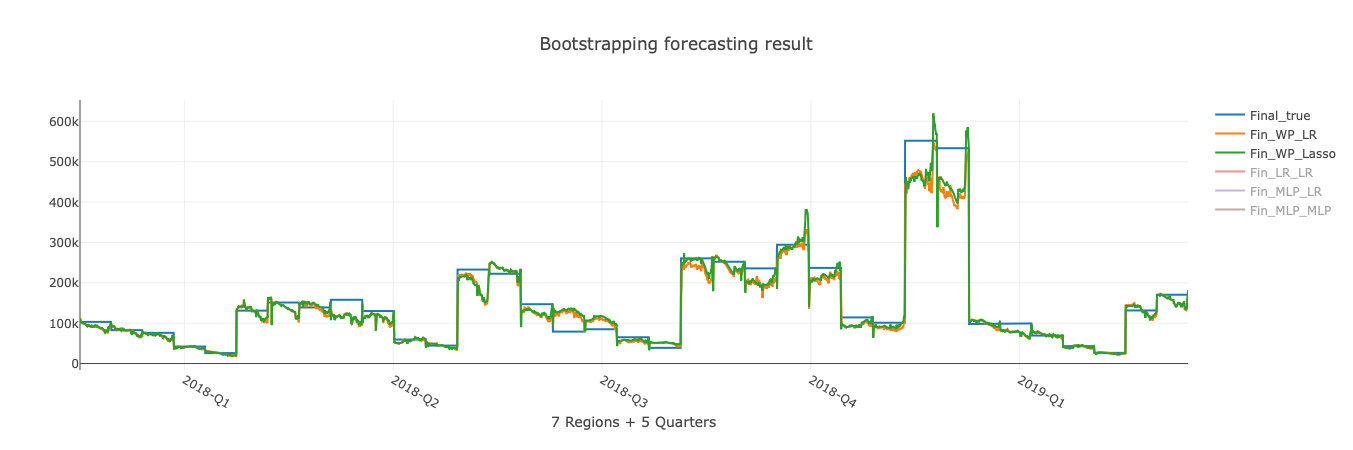

In [156]:
compares = ['Final_true', 'Fin_WP_LR', 'Fin_WP_Lasso', 'Fin_LR_LR', 'Fin_MLP_LR', 'Fin_MLP_MLP']

visulization_all(df_fin, compares)

### Or we can also plot the forecasting MAPE result

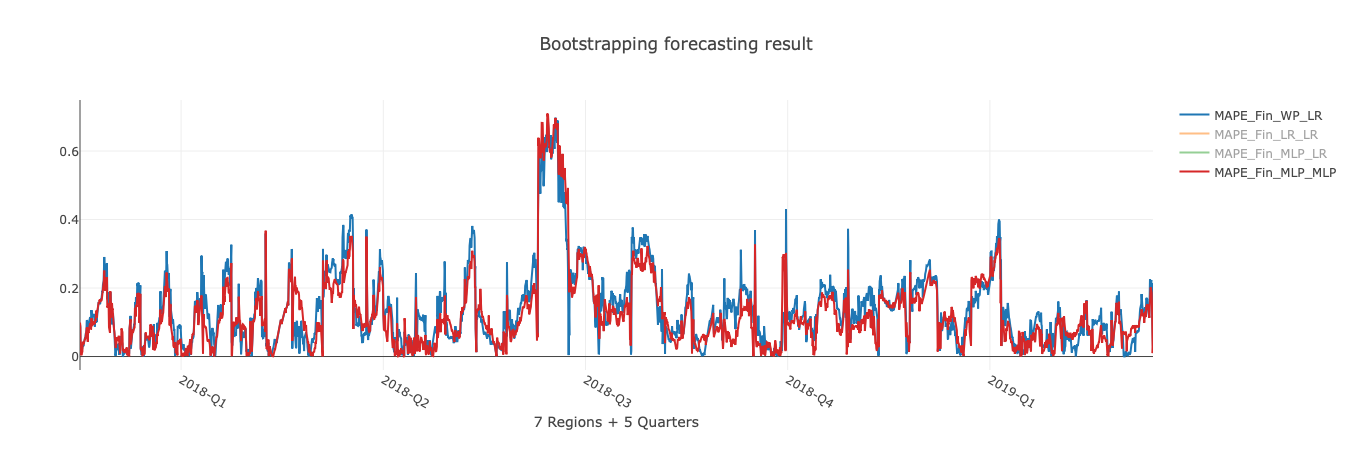

In [128]:
compares = ['MAPE_Fin_WP_LR', 'MAPE_Fin_LR_LR', 'MAPE_Fin_MLP_LR', 'MAPE_Fin_MLP_MLP']

visulization_all(df_fin, compares)

### Also we can plot the forecasting value and mape by quarters

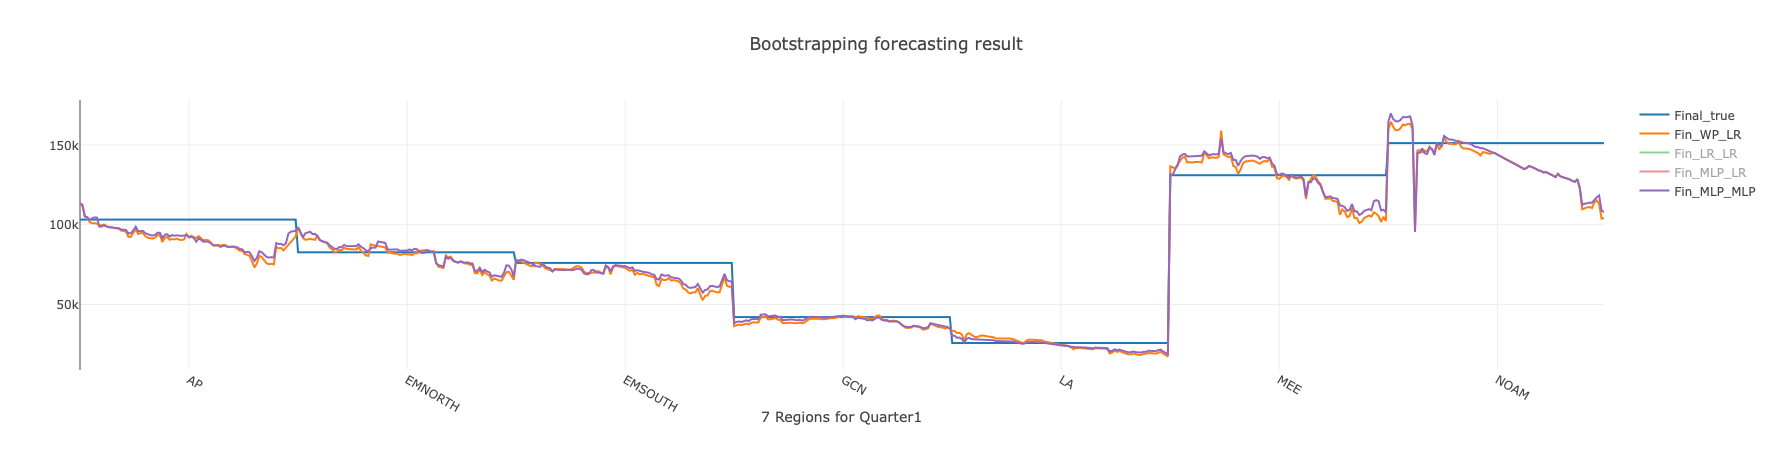

In [130]:
compares = ['Final_true', 'Fin_WP_LR', 'Fin_LR_LR', 'Fin_MLP_LR', 'Fin_MLP_MLP']
quarters = 1

visulization_quarters(df_fin, compares, quarters)

## Now we can analyse the comparsion figures of bootstrap forecasting value and MAPE for all quarters or each quarter individually.